# Problem 1

## Loading the Dataset

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.target.shape

(150,)

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Exploring the Data

In [7]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

In [8]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
pd.set_option('precision', 2)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [10]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

## Visualizing the Features

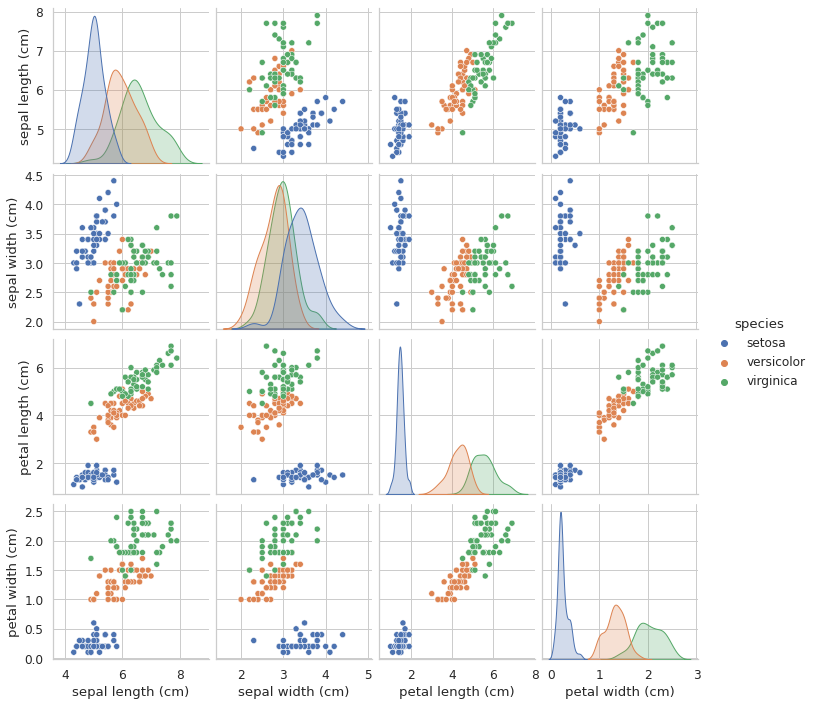

In [11]:
import seaborn as sns
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4], hue='species')

## Training the Model

In [12]:
from sklearn.cluster import KMeans
k_range = range(1, 11)
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k).fit(iris.data)
    wcss.append(kmeans.inertia_)

## Visualizing Number of clusters vs. WCSS

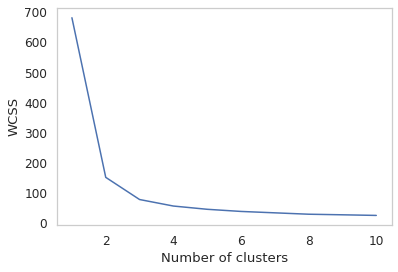

In [13]:
import matplotlib.pyplot as plt
plt.plot(k_range, wcss)
plt.grid()
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

## Find the optimal parameter

In [14]:
from sklearn.model_selection import GridSearchCV
import numpy as np
gs = {'n_clusters' : np.arange(1, 11)}
kmeans_gs = KMeans()
kmeans_param_search = GridSearchCV(kmeans_gs, gs, cv=10)
kmeans_param_search.fit(iris.data, iris.target)
kmeans_param_search.best_params_

{'n_clusters': 8}

# Problem 2

## Loading the Dataset

In [15]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [16]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [17]:
mnist.data.shape

(70000, 784)

In [18]:
mnist.target.shape

(70000,)

## Exploring the Data

In [19]:
import pandas as pd
mnist_df = pd.DataFrame(mnist.data, columns=mnist.feature_names)
mnist_df['number'] = [i for i in mnist.target]

In [20]:
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,number
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [21]:
pd.set_option('precision', 2)
mnist_df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.00,70000.00,70000.00,70000.00,70000.00,7.00e+04,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.20,0.10,0.05,0.02,0.01,1.71e-03,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.99,4.26,2.78,1.56,1.55,3.21e-01,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.00,254.00,253.00,253.00,254.00,6.20e+01,0.0,0.0,0.0,0.0


In [22]:
mnist_df['number'].describe()

count     70000
unique       10
top           1
freq       7877
Name: number, dtype: object

## Training the Model

In [23]:
from warnings import simplefilter
simplefilter(action='ignore')

In [24]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('model', LogisticRegression())])
pipe.fit(mnist.data, mnist.target)

CPU times: user 18.8 s, sys: 9.27 s, total: 28.1 s
Wall time: 15.2 s


In [25]:
pipe.score(mnist.data, mnist.target)

0.8002571428571429

In [26]:
%%time
logistic_regression = LogisticRegression().fit(mnist.data, mnist.target)

CPU times: user 1min 27s, sys: 8.83 s, total: 1min 36s
Wall time: 51.7 s


In [27]:
logistic_regression.score(mnist.data, mnist.target)

0.9332857142857143